In [ ]:
# @title Setup
import numpy as np
def ga(learning_rate,
       init,
       f,
       f_prime,
       max_iterations=1000,
       eps=1e-5):
  x = init
  x_values = []
  fs = []
  x_values.append(x)
  fs.append(f(x))
  i = 0
  while 1:
    i+=1
    if i == max_iterations + 1:
      print("exited: max_iterations")
      break
    x = x + learning_rate*(f_prime(x))
    x_values.append(x)
    f_x = f(x)
    if np.isnan(f_x):
      print("exited: NaN values")
      break
    fs.append(f_x)
    if np.sum(np.abs(x_values[-1] - x_values[-2])) < eps:
      print("exited: two consecutive x are (approximately) the same")
      break
  return fs,x_values,x

def newton(init,
       f,
       f_prime,
       f_second,
       max_iterations=100,
       eps=1e-5):
  x = init
  x_values = []
  fs = []
  x_values.append(x)
  fs.append(f(x))
  i=0
  while 1:
    i+=1
    if i == max_iterations + 1:
      print("exited: max_iterations")
      break
    if isinstance(x, np.ndarray):
      delta = np.linalg.inv(f_second(x)) @ f_prime(x)
    else:
      delta = f_prime(x) / f_second(x)
    x = x - delta
    x_values.append(x)
    f_x = f(x)
    if np.isnan(f_x):
      print("exited: NaN values")
      break
    fs.append(f_x)
    if np.sum(np.abs(x_values[-1] - x_values[-2])) < eps:
      print("exited: two consecutive x are (approximately) the same")
      break
  return fs,x_values,x

def create_plot_animation_1d(x_values,fs,f):
  from mpl_toolkits.mplot3d import Axes3D
  import numpy as np
  import matplotlib.pyplot as plt
  from matplotlib.animation import FuncAnimation
  from matplotlib import cm

  number_of_iterations = len(fs)

  fig, axs = plt.subplots(1,3,figsize=(3*4,4))
  fig.tight_layout(pad=2.5)
  xdata, ydata = [], []
  xdata2, ydata2 = [], []
  f_line, = axs[1].plot([], [], marker="o", color = 'red', markersize = 4)
  text_info = axs[0].text(0.1,0.25, '', dict(size=12.5))
  curve, = axs[2].plot([], [], marker="o", color = 'red', markersize = 4)

  aux = max(x_values) - min(x_values)
  t = np.arange(min(x_values) - 0.1*aux, max(x_values) + 0.1*aux, 0.01)

  def init():
      axs[0].axes.get_xaxis().set_visible(False)
      axs[0].axes.get_yaxis().set_visible(False)

      axs[1].set_xlim(-1, number_of_iterations)
      aux = max(fs)-min(fs)
      axs[1].set_ylim(min(fs) - 0.1*aux, max(fs) + 0.1*aux)
      axs[1].set_xlabel('iteration')
      axs[1].set_ylabel('f')

      axs[2].plot(t,f(t))
      axs[2].set_xlabel('x')
      axs[2].set_ylabel('f(x)')

      return text_info,f_line,curve

  def update(frame):
      x = x_values[frame]
      xdata2.append(frame)
      ydata2.append(fs[frame])
      f_line.set_data(xdata2,ydata2)
      # text_info.set_text(f"iteration={frame}\nx={str(np.round(x,4))}\nf={str(round(fs[frame],4))}")
      text_info.set_text(f"iteration={frame}\nx={str(x)}\nf={str(fs[frame])}")
      xdata.append(x)
      ydata.append(fs[frame])
      curve.set_data(xdata,ydata)
      return text_info,f_line,curve

  ani = FuncAnimation(fig, update, frames=number_of_iterations,
                      init_func=init, blit=True)
  return ani



def create_plot_animation(x_values,fs):
  from mpl_toolkits.mplot3d import Axes3D
  import numpy as np
  import matplotlib.pyplot as plt
  from matplotlib.animation import FuncAnimation
  from matplotlib import cm

  number_of_iterations = len(fs)

  fig, axs = plt.subplots(1,2,figsize=(2*4,4))
  fig.tight_layout(pad=2.5)
  xdata2, ydata2 = [], []
  f_line, = axs[1].plot([], [], marker="o", color = 'red', markersize = 4)
  text_info = axs[0].text(0.1,0.25, '', dict(size=12.5))

  def init():
      axs[0].axes.get_xaxis().set_visible(False)
      axs[0].axes.get_yaxis().set_visible(False)

      axs[1].set_xlim(-1, number_of_iterations)
      aux = max(fs)-min(fs)
      axs[1].set_ylim(min(fs) - 0.1*aux, max(fs) + 0.1*aux)
      axs[1].set_xlabel('iteration')
      axs[1].set_ylabel('f')

      return text_info,f_line

  def update(frame):
      x = x_values[frame]
      xdata2.append(frame)
      ydata2.append(fs[frame])
      f_line.set_data(xdata2,ydata2)
      text_info.set_text(f"iteration={frame}\nx={str(x)}\nf={str(fs[frame])}")
      return text_info,f_line

  ani = FuncAnimation(fig, update, frames=number_of_iterations,
                      init_func=init, blit=True)
  return ani

def create_plot_animation_logistic_regression_2d(x_values,fs,x1,x2,y):
  from mpl_toolkits.mplot3d import Axes3D
  import numpy as np
  import matplotlib.pyplot as plt
  from matplotlib.animation import FuncAnimation
  from matplotlib import cm

  t = np.arange(x1.min(), x1.max()+0.01, 0.1)

  number_of_iterations = len(fs)

  fig, axs = plt.subplots(1,3,figsize=(3*4,4))
  fig.tight_layout(pad=2.5)
  xdata2, ydata2 = [], []
  f_line, = axs[1].plot([], [], marker="o", color = 'red', markersize = 4)
  text_info = axs[0].text(0.1,0.25, '', dict(size=12.5))
  ab_line, = axs[2].plot([], [])

  def init():
      axs[0].axes.get_xaxis().set_visible(False)
      axs[0].axes.get_yaxis().set_visible(False)

      axs[1].set_xlim(-1, number_of_iterations)
      aux = max(fs)-min(fs)
      axs[1].set_ylim(min(fs) - 0.1*aux, max(fs) + 0.1*aux)
      axs[1].set_xlabel('iteration')
      axs[1].set_ylabel('f')

      axs[2].scatter(x1,x2,c=y)
      axs[2].set_xlabel('x1')
      axs[2].set_ylabel('x2')

      return text_info,f_line,ab_line

  def update(frame):
      x = x_values[frame]
      [w0,w1,w2] = x
      ab_line.set_data(t, -w1/w2*t - w0/w2)
      xdata2.append(frame)
      ydata2.append(fs[frame])
      f_line.set_data(xdata2,ydata2)
      text_info.set_text(f"iteration={frame}\nw={str(x)}\nf={str(fs[frame])}")
      return text_info,f_line,ab_line

  ani = FuncAnimation(fig, update, frames=number_of_iterations,
                      init_func=init, blit=True)
  return ani

# MLE - Bernoulli

$f(x) = n_0 \ln(1-x) + n_1 \ln(x)$

In [ ]:
import numpy as np
data = np.array([0,0,0,1])
n0 = (data==0).sum()
n1 = (data==1).sum()

def f(x):
  return n0*np.log(1-x) + n1*np.log(x)
def f_prime(x):
  return n1/x - n0/(1-x)
def f_second(x):
  return -n1/x**2 - n0/(1-x)**2

## Analytical Solution (Closed-form solution)

$x_\text{MLE} = \dfrac{n_1}{n}$

In [ ]:
n1 / len(data)

0.25

## Gradient Ascent

exited: two consecutive x are (approximately) the same


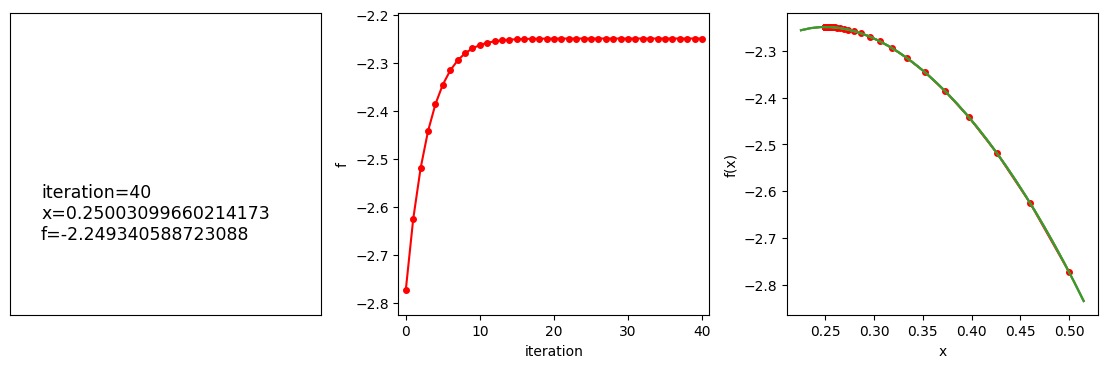

In [ ]:
learning_rate = 0.01 # @param {type:"number"}
init = 0.5 # @param {type:"number"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

fs,x_values,x=ga(learning_rate=learning_rate,
                 init=init,
                 f=f,
                 f_prime=f_prime,
                 max_iterations=max_iterations,
                 eps=eps)

animation=create_plot_animation_1d(x_values,fs,f=f)

from IPython.display import HTML
HTML(animation.to_jshtml())

exited: two consecutive x are (approximately) the same


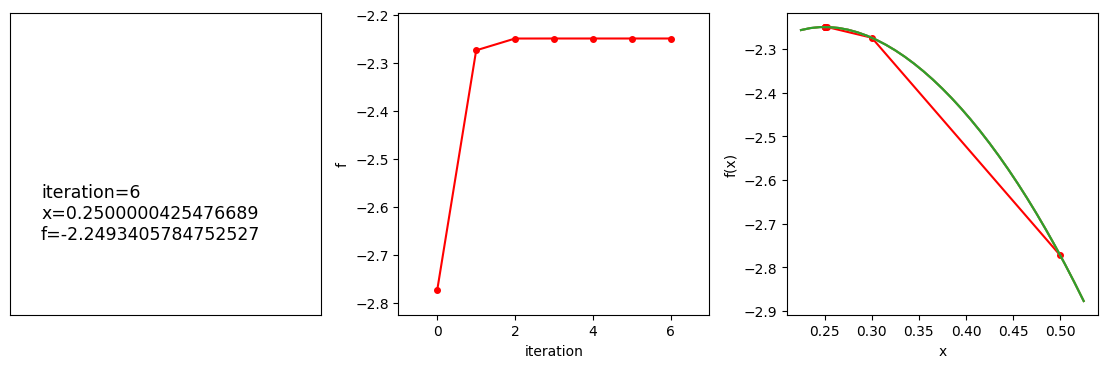

In [ ]:
learning_rate = 0.05 # @param {type:"number"}
init = 0.5 # @param {type:"number"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

fs,x_values,x=ga(learning_rate=learning_rate,
                 init=init,
                 f=f,
                 f_prime=f_prime,
                 max_iterations=max_iterations,
                 eps=eps)

animation=create_plot_animation_1d(x_values,fs,f=f)

from IPython.display import HTML
HTML(animation.to_jshtml())

In [ ]:
learning_rate = 0.09 # @param {type:"number"}
init = 0.5 # @param {type:"number"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

fs,x_values,x=ga(learning_rate=learning_rate,
                 init=init,
                 f=f,
                 f_prime=f_prime,
                 max_iterations=max_iterations,
                 eps=eps)

animation=create_plot_animation_1d(x_values,fs,f=f)

from IPython.display import HTML
HTML(animation.to_jshtml())

<ipython-input-4-b7b2ef07aa3d>:7: RuntimeWarning: invalid value encountered in log
  return n0*np.log(1-x) + n1*np.log(x)


exited: NaN values


<ipython-input-4-b7b2ef07aa3d>:7: RuntimeWarning: invalid value encountered in log
  return n0*np.log(1-x) + n1*np.log(x)


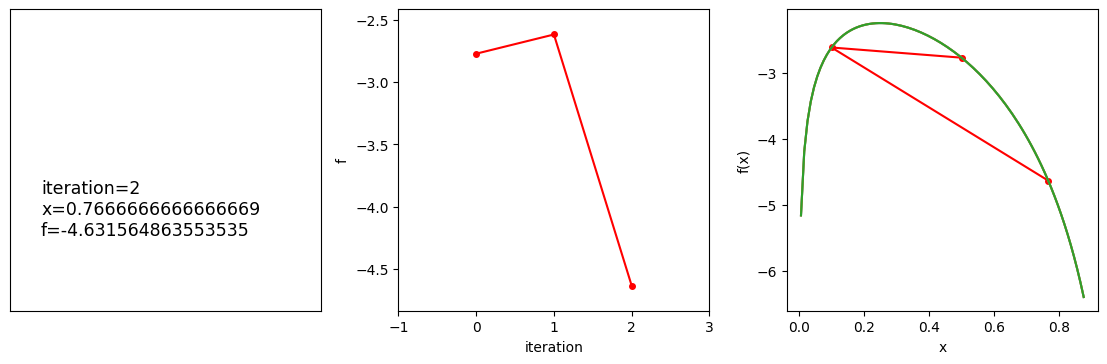

In [ ]:
learning_rate = 0.1 # @param {type:"number"}
init = 0.5 # @param {type:"number"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

fs,x_values,x=ga(learning_rate=learning_rate,
                 init=init,
                 f=f,
                 f_prime=f_prime,
                 max_iterations=max_iterations,
                 eps=eps)

animation=create_plot_animation_1d(x_values,fs,f=f)

from IPython.display import HTML
HTML(animation.to_jshtml())

## Newton's Method

exited: two consecutive x are (approximately) the same


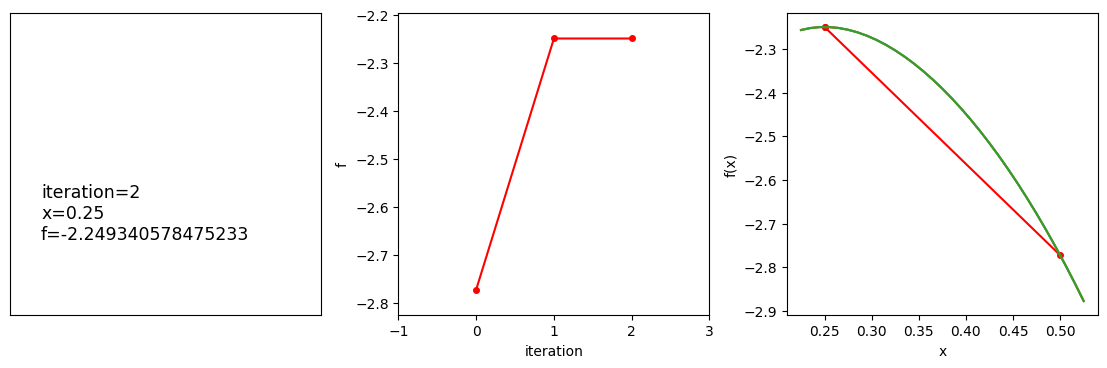

In [ ]:
init = 0.5 # @param {type:"number"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

fs,x_values,x=newton(
                 init=init,
                 f=f,
                 f_prime=f_prime,
                 f_second=f_second,
                 max_iterations=max_iterations,
                 eps=eps)

animation=create_plot_animation_1d(x_values,fs,f=f)

from IPython.display import HTML
HTML(animation.to_jshtml())

exited: two consecutive x are (approximately) the same


<ipython-input-9-a84486a0cc08>:7: RuntimeWarning: invalid value encountered in log
  return n0*np.log(1-x) + n1*np.log(x)
<ipython-input-9-a84486a0cc08>:7: RuntimeWarning: invalid value encountered in log
  return n0*np.log(1-x) + n1*np.log(x)


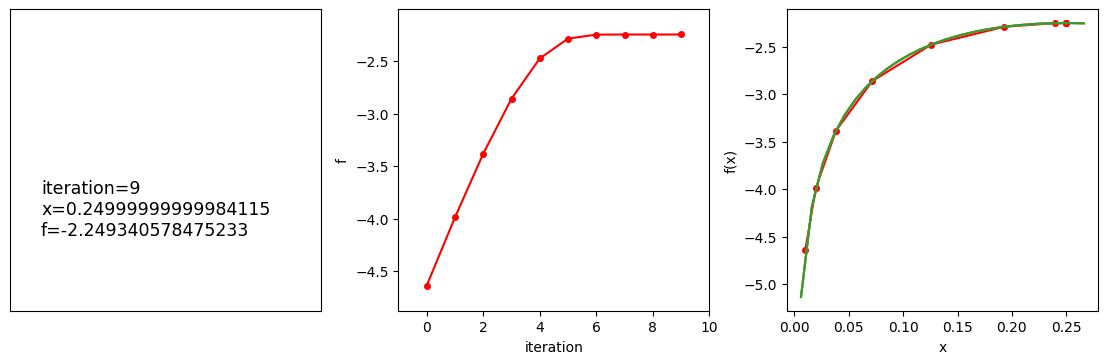

In [ ]:
init = 0.01 # @param {type:"number"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

fs,x_values,x=newton(
                 init=init,
                 f=f,
                 f_prime=f_prime,
                 f_second=f_second,
                 max_iterations=max_iterations,
                 eps=eps)

animation=create_plot_animation_1d(x_values,fs,f=f)

from IPython.display import HTML
HTML(animation.to_jshtml())

# Logistic Regression

$f(w) = \sum_{i=1}^n \left( (1-y^{(i)}) \ln(1-\sigma(w \cdot x^{(i)})) + y^{(i)} \ln(\sigma(w \cdot x^{(i)})) \right)$

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [2,2]
])
y = np.array([[1],[0],[0],[1]])

X_with_extra_col = np.concatenate((np.ones((len(X),1)),X),axis=1)

def get_y_pred(x):
  return sigmoid(X_with_extra_col @ x)
def f(x):
  y_pred = get_y_pred(x)
  return np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
def f_gradient(x):
  y_pred = get_y_pred(x)
  return X_with_extra_col.T @ (y - y_pred)
def f_hessian(x):
  y_pred = get_y_pred(x)
  return -X_with_extra_col.T @ np.diag((y_pred * (1-y_pred)).squeeze()) @ X_with_extra_col

## Gradient Ascent

In [ ]:
learning_rate = 0.1 # @param {type:"number"}
init = "0 0 0" # @param {type:"string"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

init = np.fromstring(init,sep=" ")
init = init[...,np.newaxis]
fs,x_values,x=ga(learning_rate=learning_rate,
                 init=init,
                 f=f,
                 f_prime=f_gradient,
                 max_iterations=max_iterations,
                 eps=eps)

if X.shape[1] == 2:
  animation=create_plot_animation_logistic_regression_2d(x_values,
                                                       fs,
                                                       X[:,0],
                                                       X[:,1],
                                                       y)
else:
  animation=create_plot_animation(x_values, fs)

from IPython.display import HTML
HTML(animation.to_jshtml())

In [ ]:
learning_rate = 1 # @param {type:"number"}
init = "0 0 0" # @param {type:"string"}
max_iterations=1000 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

init = np.fromstring(init,sep=" ")
init = init[...,np.newaxis]
fs,x_values,x=ga(learning_rate=learning_rate,
                 init=init,
                 f=f,
                 f_prime=f_gradient,
                 max_iterations=max_iterations,
                 eps=eps)

if X.shape[1] == 2:
  animation=create_plot_animation_logistic_regression_2d(x_values,
                                                       fs,
                                                       X[:,0],
                                                       X[:,1],
                                                       y)
else:
  animation=create_plot_animation(x_values, fs)

from IPython.display import HTML
HTML(animation.to_jshtml())

## Newton Method

exited: two consecutive x are (approximately) the same


<ipython-input-1-1ed251df2137>:195: RuntimeWarning: invalid value encountered in divide
  ab_line.set_data(t, -w1/w2*t - w0/w2)


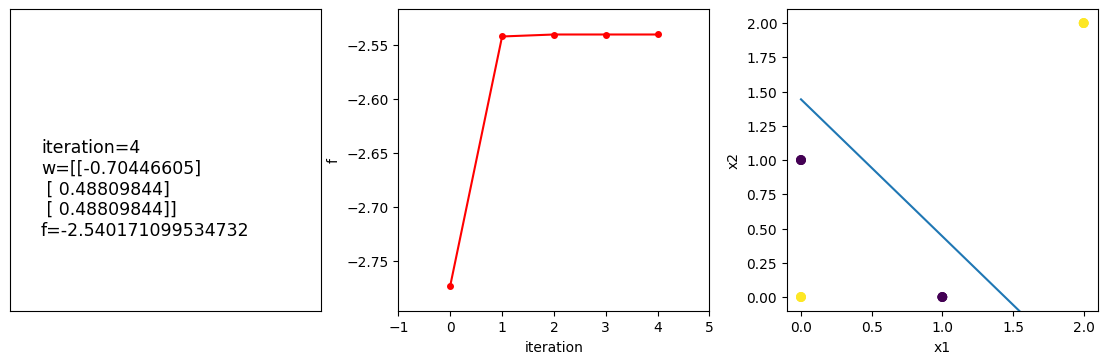

In [ ]:
init = "0 0 0" # @param {type:"string"}
max_iterations=100 # @param {type:"number"}
eps=1e-5 # @param {type:"number"}

init = np.fromstring(init,sep=" ")
init = init[...,np.newaxis]
fs,x_values,x=newton(
                 init=init,
                 f=f,
                 f_prime=f_gradient,
                 f_second=f_hessian,
                 max_iterations=max_iterations,
                 eps=eps)

if X.shape[1] == 2:
  animation=create_plot_animation_logistic_regression_2d(x_values,
                                                       fs,
                                                       X[:,0],
                                                       X[:,1],
                                                       y)
else:
  animation=create_plot_animation(x_values, fs)

from IPython.display import HTML
HTML(animation.to_jshtml())